# Lab 02 - Bài tập

## MATPLOTLIB



In [108]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


### Bài 1

Cho dữ liệu 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

1. Đọc dữ liệu và gán vào cho biến chipo. hiển thi 10 dòng đầu của dữ liệu
2. Tạo biến x chứa các item_name, in head của x. Sử dụng collections.Counter(x) để tạo một dictionary với key là item_name và value là tần suất xuất hiện của item_name, gán cho biến letter_counts. In letter_counts
3. Chuyển letter_counts thành DataFrame và đặt tên là df
4. Sắp xếp df theo tần suất giảm dần, và lấy 5 item đầu tiên. Vẽ biểu đồ khối với 5 item này có title xlabel, ylabel và xsticks
5. Cập nhật lại cột item_price với đơn giá là số thực. Nhóm các đơn hàng theo order_id. Tính tổng giá trị của mỗi đơn hàng => gán vào biến orders. In head của orders
6. Vẽ scatterplot của orders với x là orders.item_price và y là orders.quantityc có title xlabel, ylabel

In [109]:
import requests

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
response = requests.get(url)

# Save the content to a file
with open("chipotle.tsv", "wb") as file:
    file.write(response.content)

print("File downloaded successfully.")

File downloaded successfully.


In [110]:
df = pd.read_csv('./chipotle.tsv', sep='\t')


In [111]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [112]:
x = df['item_name']
x.head()

0             Chips and Fresh Tomato Salsa
1                                     Izze
2                         Nantucket Nectar
3    Chips and Tomatillo-Green Chili Salsa
4                             Chicken Bowl
Name: item_name, dtype: object

In [113]:
letter_counts = Counter(x)
letter_counts

Counter({'Chicken Bowl': 726,
         'Chicken Burrito': 553,
         'Chips and Guacamole': 479,
         'Steak Burrito': 368,
         'Canned Soft Drink': 301,
         'Chips': 211,
         'Steak Bowl': 211,
         'Bottled Water': 162,
         'Chicken Soft Tacos': 115,
         'Chips and Fresh Tomato Salsa': 110,
         'Chicken Salad Bowl': 110,
         'Canned Soda': 104,
         'Side of Chips': 101,
         'Veggie Burrito': 95,
         'Barbacoa Burrito': 91,
         'Veggie Bowl': 85,
         'Carnitas Bowl': 68,
         'Barbacoa Bowl': 66,
         'Carnitas Burrito': 59,
         'Steak Soft Tacos': 55,
         '6 Pack Soft Drink': 54,
         'Chips and Tomatillo Red Chili Salsa': 48,
         'Chicken Crispy Tacos': 47,
         'Chips and Tomatillo Green Chili Salsa': 43,
         'Carnitas Soft Tacos': 40,
         'Steak Crispy Tacos': 35,
         'Chips and Tomatillo-Green Chili Salsa': 31,
         'Steak Salad Bowl': 29,
         'Nantucket N

In [114]:
df['item_price'] = df['item_price'].str.replace('$', '').astype(float)
orders = df.groupby('order_id').sum()
print(orders.head())

          quantity                                          item_name  \
order_id                                                                
1                4  Chips and Fresh Tomato SalsaIzzeNantucket Nect...   
2                2                                       Chicken Bowl   
3                2                          Chicken BowlSide of Chips   
4                2                      Steak BurritoSteak Soft Tacos   
5                2                   Steak BurritoChips and Guacamole   

                                         choice_description  item_price  
order_id                                                                 
1                                       [Clementine][Apple]       11.56  
2         [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  
3         [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...       12.67  
4         [Tomatillo Red Chili Salsa, [Fajita Vegetables...       21.00  
5         [Fresh Tomato Salsa, [Rice, Black 

### Bài 2

Cho dữ liệu thô như sau: 

```python
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
            'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
            'female': [0, 1, 1, 0, 1],
            'age': [42, 52, 36, 24, 73], 
            'preTestScore': [4, 24, 31, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70]}
```            
2.1. Tạo DataFrame df từ dữ liệu trên. In df.

2.2. Câu 2: Tạo một Scatterplot của preTestScore và postTestScore, với kích thước s của mỗi điểm được xác định theo age. Thiết lập xlabel, ylabel và title.

2.3. Tạo một Scatterplot của preTestScore và postTestScore. Lần này kích thước s sẽ gấp 4.5 lần postTestScore. Màu c được xác định theo giới tính (df.female). Thiết lập xlabel, ylabel và title.

In [115]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
            'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
            'female': [0, 1, 1, 0, 1],
            'age': [42, 52, 36, 24, 73], 
            'preTestScore': [4, 24, 31, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70]}
df = pd.DataFrame(raw_data)
df

,first_name,last_name,female,age,preTestScore,postTestScore
0,Jason,Miller,0,42,4,25
1,Molly,Jacobson,1,52,24,94
2,Tina,Ali,1,36,31,57
3,Jake,Milner,0,24,2,62
4,Amy,Cooze,1,73,3,70


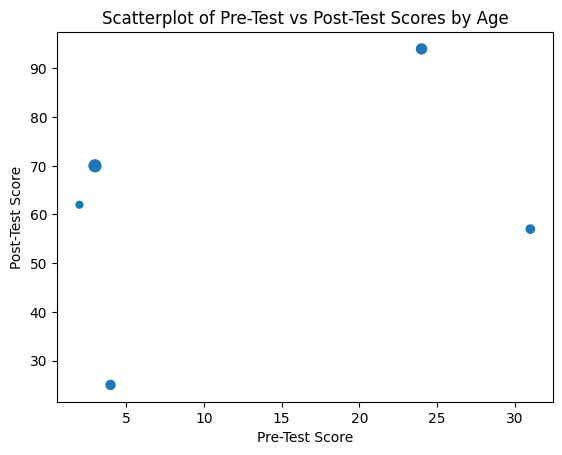

In [116]:
plt.scatter(df['preTestScore'], df['postTestScore'], s=df['age'])
plt.xlabel('Pre-Test Score')
plt.ylabel('Post-Test Score')
plt.title('Scatterplot of Pre-Test vs Post-Test Scores by Age')
plt.show()

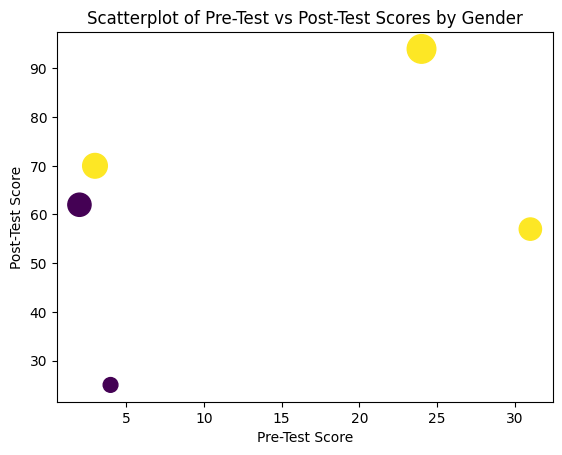

In [117]:
plt.scatter(df['preTestScore'], df['postTestScore'], s=4.5 * df['postTestScore'], c=df['female'], cmap='viridis')
plt.xlabel('Pre-Test Score')
plt.ylabel('Post-Test Score')
plt.title('Scatterplot of Pre-Test vs Post-Test Scores by Gender')
plt.show()


### Bài 3

Cho dữ liệu year, pop, gdp_cap, life_exp từ tập tin `du_lieu_year_gap_pop_life.txt`, col từ tập tin `col.txt`

**Hãy thực hiện các yêu cầu sau:**

1. Tạo year, pop. In item cuối của year và pop
2. Vẽ biểu đồ line của year và pop với x-axis: year, y-axis: pop
3. Tạo gdp_cap, life_exp. In item cuối của gdp_cap, life_exp
4. Vẽ biểu đồ line của gdp_cap, life_exp với x-axis: gdp_cap, y-axis: life_exp. Biểu đồ này có thể xem được không? Nếu không thì đề xuất một loại biểu đồ phù hợp 
5. Vẽ histogram của life_exp, màu cột xanh, viền đỏ
6. Vẽ histogram với bins = 5, màu cột xanh dương, viền đỏ
7. Vẽ histogram với bins = 20, màu cột xanh dương, viền đỏ
8. Từ life_exp1950 trong tập tin => Tạo life_exp1950. Vẽ histogram life_exp1950, với bins = 15, màu cột xanh dương, viền đỏ
9. Tạo scatter plot của gdp_gap và life_exp, sử dụng plt.xscale('log'). Thiết lập xlabel, ylabel, title
10. Tạo Scatter plot của gdp_gap và life_exp, sử dụng plt.xscale('log'). Thiết lập xlabel, ylabel, title. plt.scatter(gdp_cap, life_exp). Với: tick_val = [1000,10000,100000] và tick_lab = ['1k','10k','100k'] => plt.xticks(tick_val, tick_lab)
11. Đưa pop vào array np_pop. Vẽ scatter plot của gdp_cap, life_exp, với s = np_pop * 2, màu magenta. Thiết lập xlabel, ylabel, title và plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
12. Tạo col từ col trong tập tin col.txt. Vẽ scatter plot của gdp_cap, life_exp, với s = np.array(pop) * 2, màu c = col, alpha=0.8. Thiết lập xlabel, ylabel, title và plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
13. Tạo col từ col trong tập tin col.txt. Vẽ scatter plot của gdp_cap, life_exp, với s = np.array(pop) * 2, màu c = col, alpha=0.8. Thiết lập xlabel, ylabel, title và plt.xticks([1000, 10000, 100000],['1k', '10k', '100k']). Thêm text cho 2 nơi trên biểu đồ là India và China: plt.text(1550, 71, 'India'), plt.text(5700, 80, 'China'). Thêm lưới cho biểu đồ

In [118]:
with open('dulieu_year_gap_pop_life.txt', 'r') as file:
    lines = file.readlines()

year = []
pop = []
gdp_cap = []
life_exp = []
life_exp1950 = []

for line in lines:
    if line.startswith('year'):
        year = eval(line.split('=')[1].strip())
    elif line.startswith('pop'):
        pop = eval(line.split('=')[1].strip())
    elif line.startswith('gdp_cap'):
        gdp_cap = eval(line.split('=')[1].strip())
    elif line.startswith('life_exp1950'):
        life_exp1950 = eval(line.split('=')[1].strip())
    elif line.startswith('life_exp'):
        life_exp = eval(line.split('=')[1].strip())
print("year:", year)
print("pop:", pop)
print("gdp_cap:", gdp_cap)
print("life_exp1950:", life_exp1950)
print("life_exp:", life_exp)



year: [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100]
pop: [2.53, 2.57, 2.62, 2.67, 2.71, 2.76, 2.81, 2.86, 2.92, 2.97, 3.03, 3.08, 3.14, 3.2

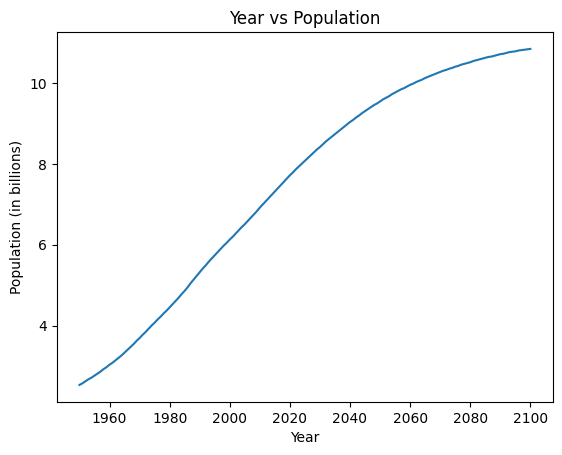

In [119]:
plt.plot(year, pop)
plt.xlabel('Year')
plt.ylabel('Population (in billions)')
plt.title('Year vs Population')
plt.show()


In [120]:
print(f"Item cuối của gdp_cap: {gdp_cap[-1]}")
print(f"Item cuối của life_exp: {life_exp[-1]}")


Item cuối của gdp_cap: 469.70929810000007
Item cuối của life_exp: 43.487


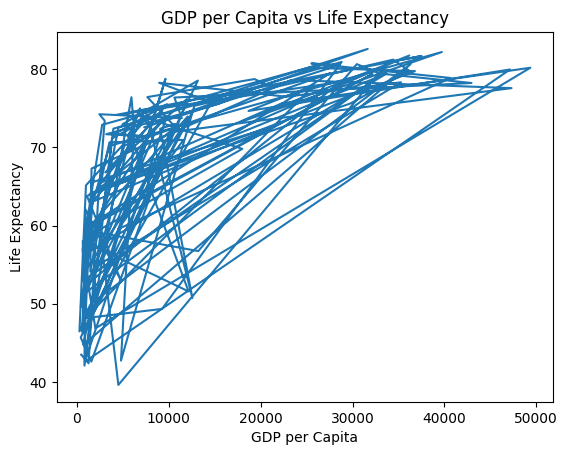

In [121]:
plt.plot(gdp_cap, life_exp)
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('GDP per Capita vs Life Expectancy')
plt.show()


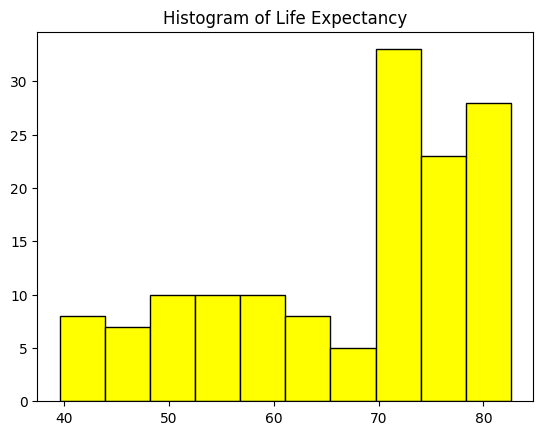

In [122]:
plt.hist(life_exp, color='yellow', edgecolor='black')
plt.title('Histogram of Life Expectancy')
plt.show()

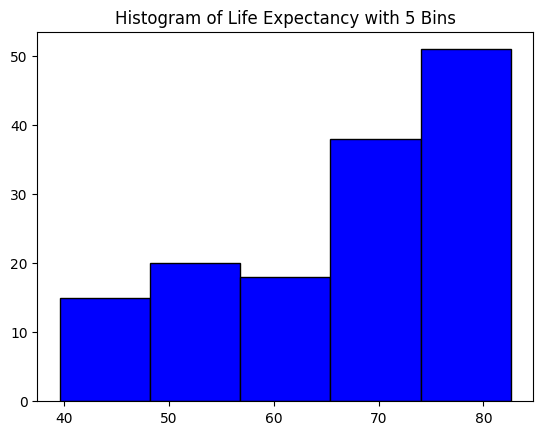

In [123]:
plt.hist(life_exp, bins=5, color='blue', edgecolor='black')
plt.title('Histogram of Life Expectancy with 5 Bins')
plt.show()

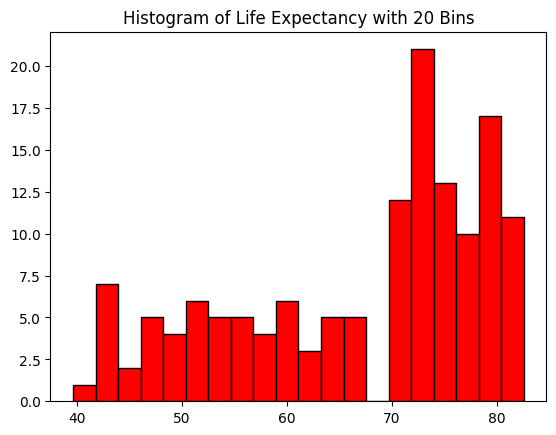

In [124]:
plt.hist(life_exp, bins=20, color='red', edgecolor='black')
plt.title('Histogram of Life Expectancy with 20 Bins')
plt.show()

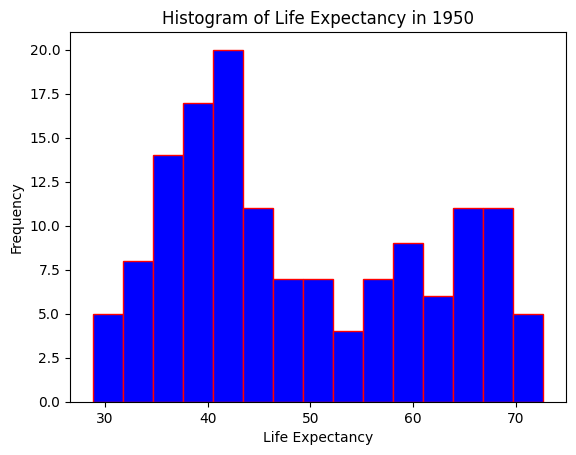

In [125]:
# bước 8
plt.hist(life_exp1950, bins=15, color='blue', edgecolor='red')
plt.title('Histogram of Life Expectancy in 1950')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

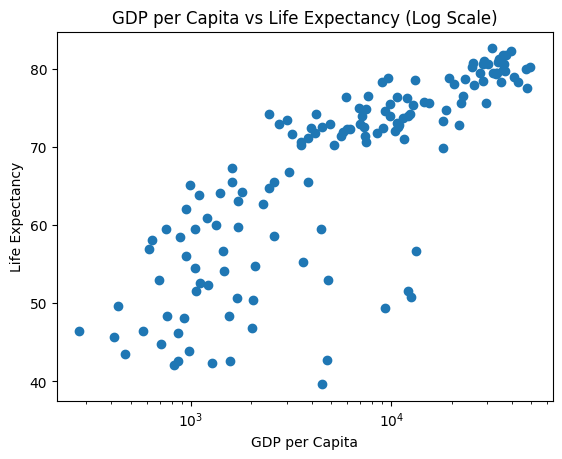

In [126]:
plt.scatter(gdp_cap, life_exp)
plt.xscale('log')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('GDP per Capita vs Life Expectancy (Log Scale)')
plt.show()


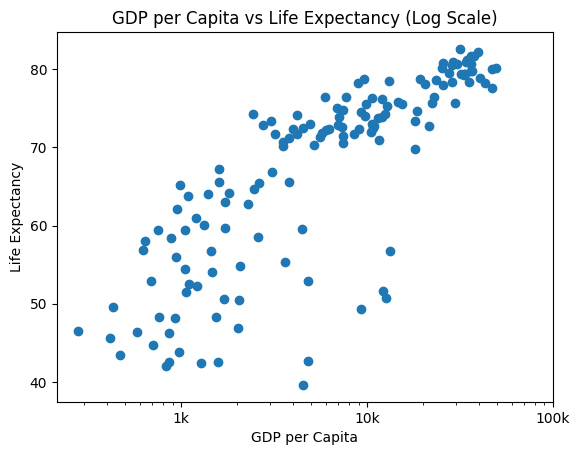

In [127]:
tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']

plt.scatter(gdp_cap, life_exp)
plt.xscale('log')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('GDP per Capita vs Life Expectancy (Log Scale)')
plt.xticks(tick_val, tick_lab)
plt.show()


Kích thước của gdp_cap: 142
Kích thước của life_exp: 142
Kích thước của np_pop: 142


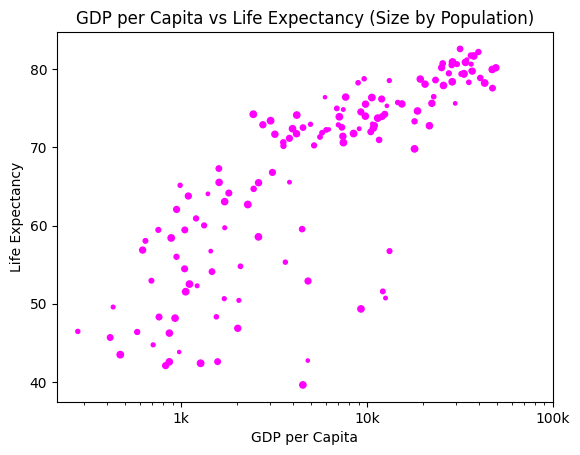

In [128]:
np_pop = np.array(pop)
min_length = min(len(gdp_cap), len(life_exp), len(np_pop))
gdp_cap = gdp_cap[:min_length]
life_exp = life_exp[:min_length]
np_pop = np_pop[:min_length]
print(f"Kích thước của gdp_cap: {len(gdp_cap)}")
print(f"Kích thước của life_exp: {len(life_exp)}")
print(f"Kích thước của np_pop: {len(np_pop)}")


if len(gdp_cap) == len(life_exp) == len(np_pop):
    plt.scatter(gdp_cap, life_exp, s=np_pop * 2, color='magenta')
    plt.xscale('log')
    plt.xlabel('GDP per Capita')
    plt.ylabel('Life Expectancy')
    plt.title('GDP per Capita vs Life Expectancy (Size by Population)')
    tick_val = [1000, 10000, 100000]
    tick_lab = ['1k', '10k', '100k']
    plt.xticks(tick_val, tick_lab)
    plt.show()
else:
    print("Kích thước của các mảng không khớp, vui lòng kiểm tra dữ liệu.")


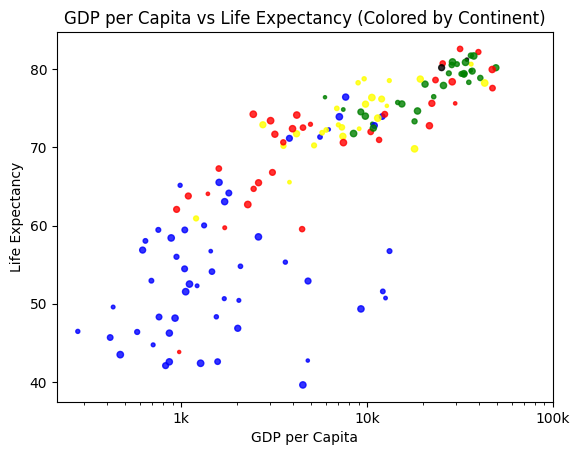

In [129]:
# Đọc màu từ tập tin col.txt
with open('col.txt', 'r') as file:
    col = eval(file.read().split('=')[1].strip())
min_length = min(len(gdp_cap), len(life_exp), len(np_pop), len(col))

gdp_cap = gdp_cap[:min_length]
life_exp = life_exp[:min_length]
np_pop = np_pop[:min_length]
col = col[:min_length]
# Vẽ scatter plot với màu c = col và alpha = 0.8
plt.scatter(gdp_cap, life_exp, s=np_pop * 2, c=col, alpha=0.8)
plt.xscale('log')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('GDP per Capita vs Life Expectancy (Colored by Continent)')
plt.xticks(tick_val, tick_lab)
plt.show()


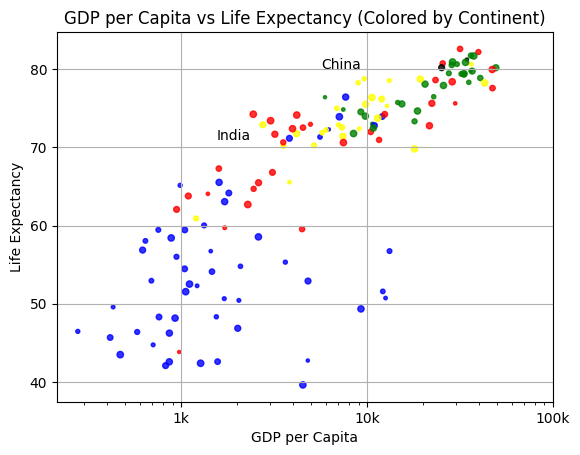

In [130]:
# bai 12
plt.scatter(gdp_cap, life_exp, s=np_pop * 2, c=col, alpha=0.8)
plt.xscale('log')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('GDP per Capita vs Life Expectancy (Colored by Continent)')
plt.xticks(tick_val, tick_lab)
plt.text(1550, 71, 'India')
plt.text(5700, 80, 'China')
plt.grid(True)
plt.show()


## SEABORN



### Bài 4

4.1. Hãy vẽ barplot cho dữ liệu sau:

```python
    x =  ["Excellent","Very Good","Good","Midium"]
    y = [5.0,15.0,20.0,5.0]
```
4.2. Cho dữ liệu:
```python
chars = "A A A A A A A A A A B B B B B B C C C C C C D D D D D D D D D D E E E E E E E F F F F G G G G G G G H H H H"
````
Hãy vẽ **barplot** với mỗi cột có tên là ký tự, giá trị là số lần xuất hiện của ký tự đó trong chuỗ

4.3. Biểu diễn dữ liệu `chars` ở trên bằng swarmplot

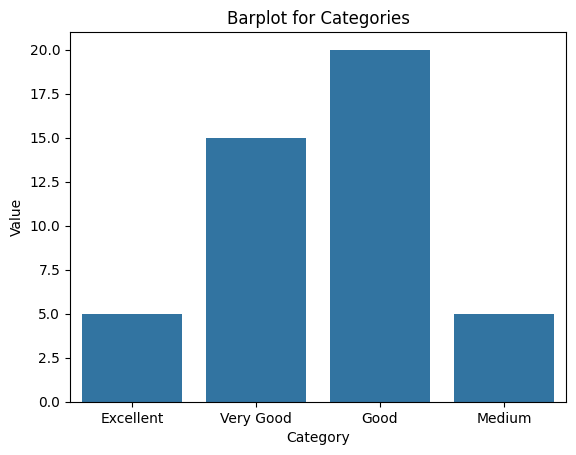

In [131]:
# 4.1
x = ["Excellent", "Very Good", "Good", "Medium"]
y = [5.0, 15.0, 20.0, 5.0]

sns.barplot(x=x, y=y)
plt.title('Barplot for Categories')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()


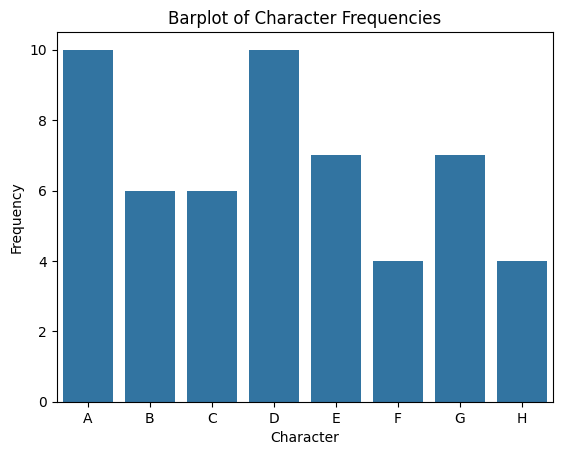

In [132]:
#  4.2
chars = "A A A A A A A A A A B B B B B B C C C C C C D D D D D D D D D D E E E E E E E F F F F G G G G G G G H H H H"

char_count = Counter(chars.split())
char_labels = list(char_count.keys())
char_values = list(char_count.values())
# Vẽ barplot sử dụng Seaborn
sns.barplot(x=char_labels, y=char_values)
plt.title('Barplot of Character Frequencies')
plt.xlabel('Character')
plt.ylabel('Frequency')
plt.show()



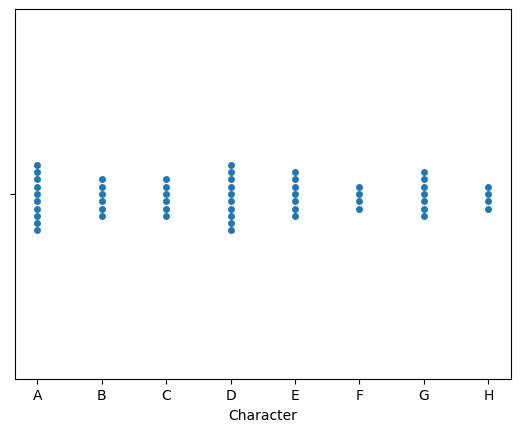

In [133]:
#  4.3
chars = "A A A A A A A A A A B B B B B B C C C C C C D D D D D D D D D D E E E E E E E F F F F G G G G G G G H H H H"
char_list = chars.split()
df = pd.DataFrame({'Character': char_list})

# Vẽ swarmplot sử dụng Seaborn
sns.swarmplot(x='Character', data=df)
plt.xlabel('Character')
plt.show()


### Bài 5

Cho dữ liệu `Pokemon.csv` => đọc dữ liệu: 

5.1. Vẽ scatterplot: Phân loại với các điểm không chồng chéo, so sánh Attack (trục x) & Defense (trục y)

5.2. Vẽ scatterplot: So sánh Attack (trục x) & Defense (trục y), có sử dụng thêm regression line với lmplot()

5.3. Vẽ regression plot: thể hiện mối quan hệ tuyến tính giữa Attack (trục x) & Speed(trục y)

5.4. Vẽ boxplot cho toàn bộ dữ liệu

5.5. Vẽ boxplot không có các cột 'Total', 'Generation', 'Legendary'

5.6. Vẽ histogram: biểu diễn tần suất của cột Attack 

5.7. Vẽ barplot: Nhóm dữ liệu theo Type 1, cho biết mỗi type có mấy mẫu, sắp tăng dần

5.8. Vẽ pairplot: thể hiện mối quan hệ giữa "Attack", "Defense" theo từng 'Type 1'

5.9. Vẽ JointGrid: gồm sb.regplot, sb.distplot để thể hiện mối quan hệ giữa "Attack", "Defense"

5.10. Vẽ JointPlot: thể hiện mối quan hệ giữa 'HP' và 'Speed' dạng hex

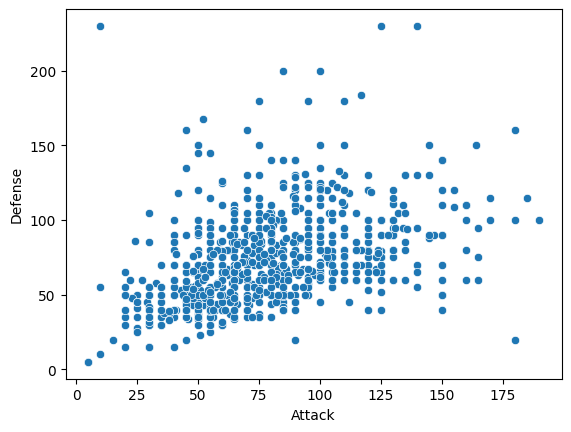

In [134]:
# 5.1
df = pd.read_csv('pokemon.csv')
sns.scatterplot(x='Attack', y='Defense', data=df)
plt.show()

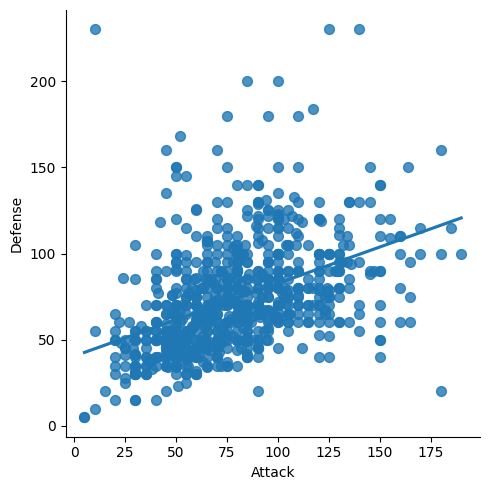

In [135]:
# 5.2
sns.lmplot(x='Attack', y='Defense', data=df, scatter_kws={"s": 50}, ci=None)
plt.show()


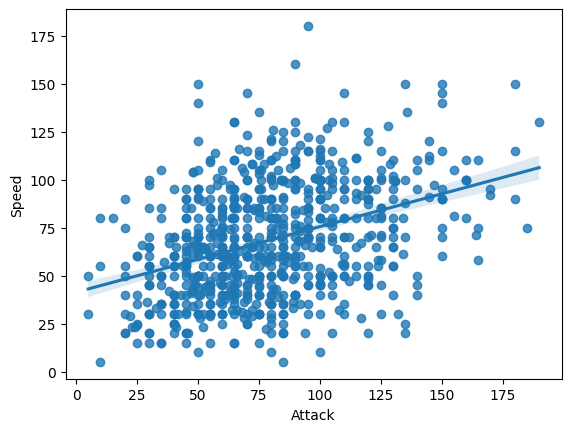

In [136]:
# 5.3
sns.regplot(x='Attack', y='Speed', data=df)
plt.show()


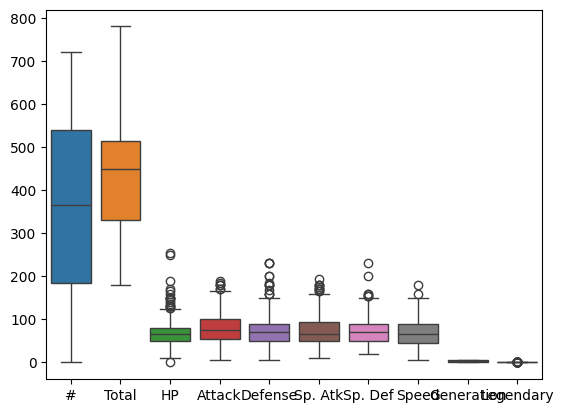

In [137]:
# 5.4
sns.boxplot(data=df)
plt.show()


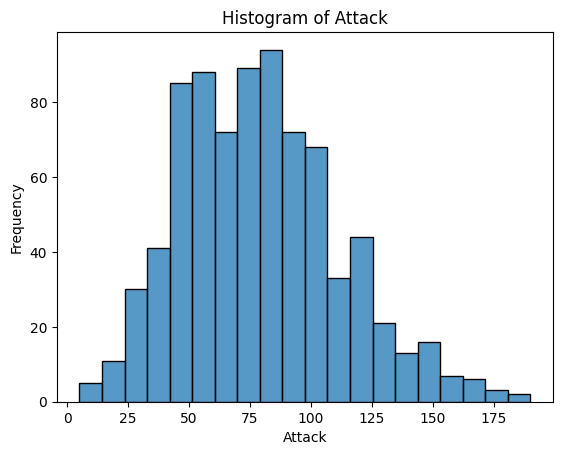

In [138]:
# 5.6
sns.histplot(df['Attack'], kde=False)
plt.title('Histogram of Attack')
plt.xlabel('Attack')
plt.ylabel('Frequency')
plt.show()



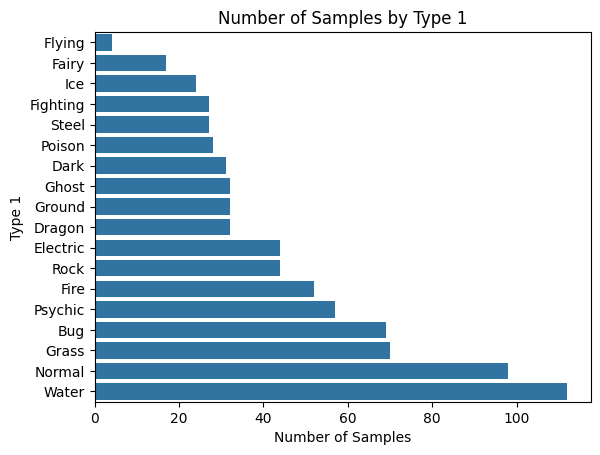

In [139]:
# 5.7
type_counts = df['Type 1'].value_counts().sort_values()

sns.barplot(x=type_counts.values, y=type_counts.index)
plt.title('Number of Samples by Type 1')
plt.xlabel('Number of Samples')
plt.ylabel('Type 1')
plt.show()


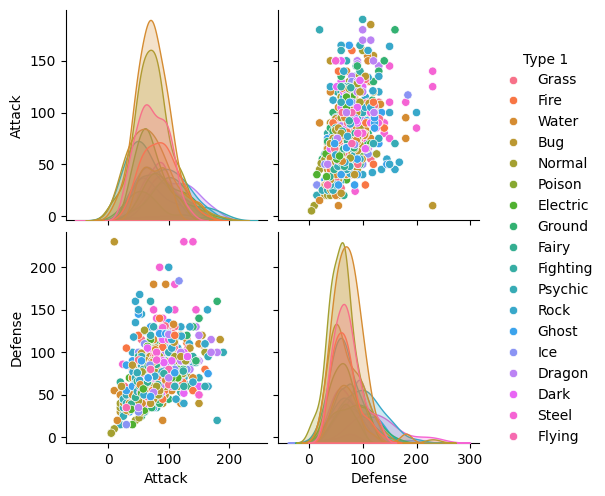

In [140]:
# 5.8
sns.pairplot(df, vars=['Attack', 'Defense'], hue='Type 1')
plt.show()


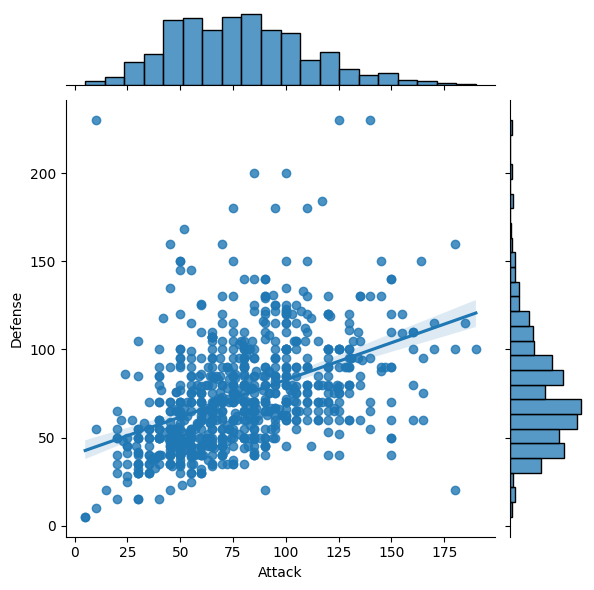

In [141]:
# 5.9
g = sns.JointGrid(data=df, x='Attack', y='Defense')
g.plot(sns.regplot, sns.histplot)
plt.show()


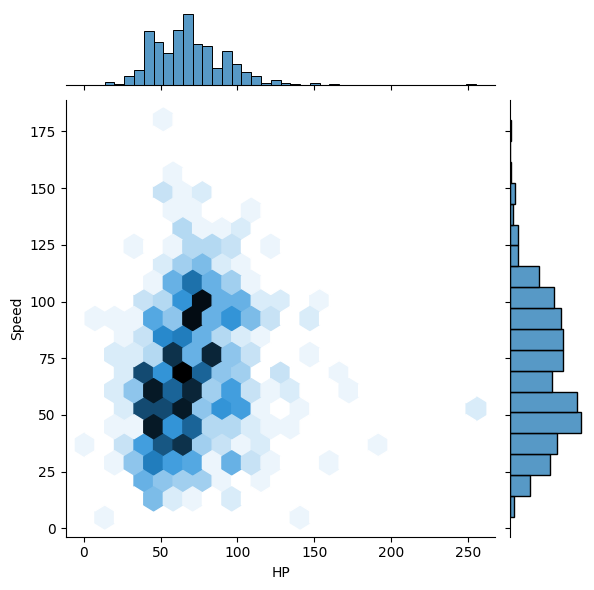

In [142]:
# 5.10
sns.jointplot(x='HP', y='Speed', data=df, kind='hex', gridsize=20)
plt.show()


### Bài 6

Cho dữ liệu `tips` có sẵn trong seaborn library. Hãy vẽ những biểu đồ sau:

6.1. Vẽ violinplot cho cho cột total_bill

6.2. Vẽ swarmplot cho cột total_bill theo sex

6.3. Vẽ boxplot cho cột total_bill

6.4. Tạo FacetGrid với 'time' và chỉ định thứ tự của các hàng bằng row_order, ánh xạ (map) của 'total_bill' lên lưới

6.5. Tạo Factor plot (phiên bản mới là catplot) chứa point plot của giá trị 'total_bill'

6.6. Tạo PairGrid với một scatter plot "total_bill" và "tip"

6.7. Tạo Pairplot với một scatter plot "total_bill" và "tip", sử dụng palette color = 'day'

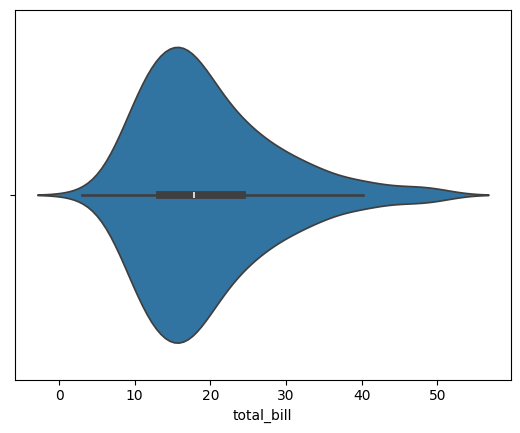

In [143]:
#  6.1
tips = sns.load_dataset('tips')
sns.violinplot(x='total_bill', data=tips)
plt.show()

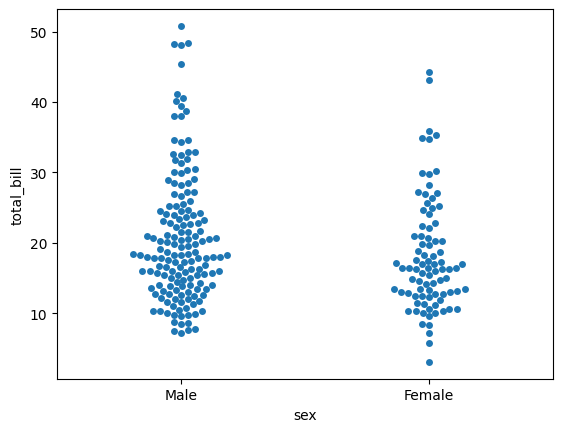

In [144]:
# 6.2 
sns.swarmplot(x='sex', y='total_bill', data=tips)
plt.show()


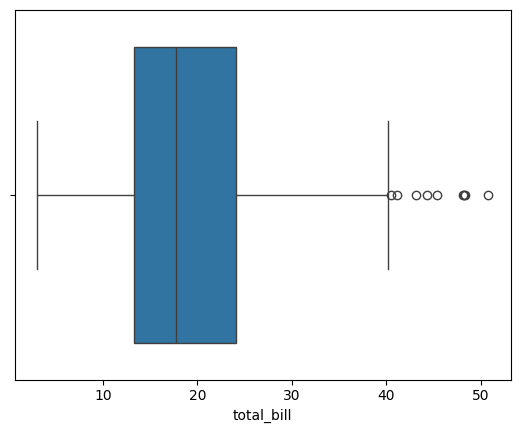

In [145]:
# 6.3
sns.boxplot(x='total_bill', data=tips)
plt.show()


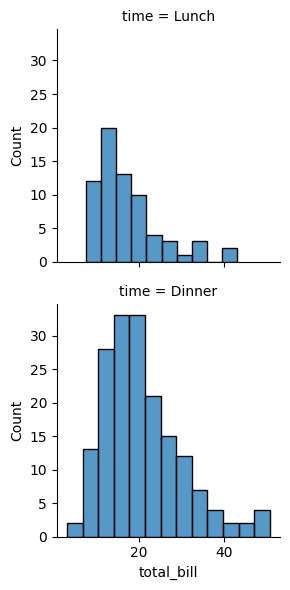

In [146]:
# 6.4
g = sns.FacetGrid(tips, row='time', row_order=['Lunch', 'Dinner'])
g.map(sns.histplot, 'total_bill')
plt.show()


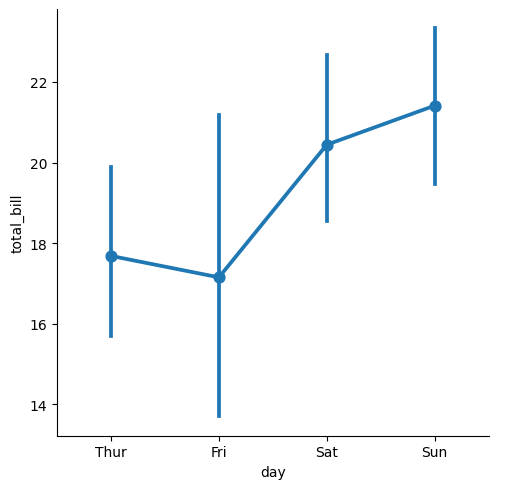

In [147]:
# 6.5
sns.catplot(x='day', y='total_bill', kind='point', data=tips)
plt.show()


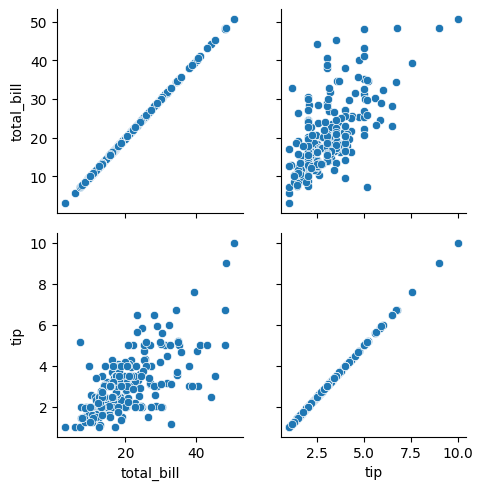

In [148]:
# 6.6
g = sns.PairGrid(tips, vars=['total_bill', 'tip'])
g.map(sns.scatterplot)
plt.show()


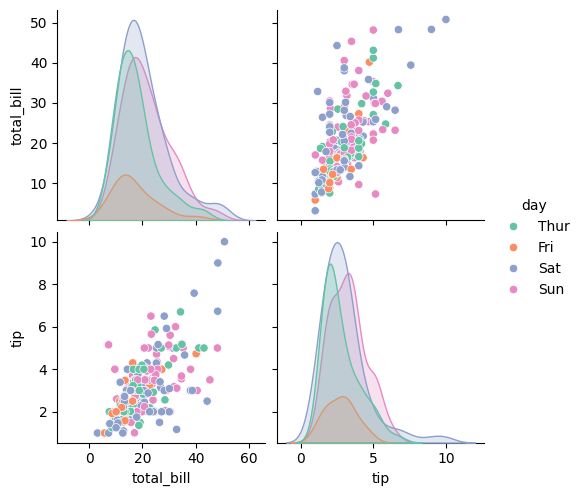

In [149]:
# 6.7
sns.pairplot(tips, vars=['total_bill', 'tip'], hue='day', palette='Set2')
plt.show()


### Bài 7

Cho dữ liệu `titanic` có sẵn trong seaborn library. Hãy vẽ những biểu đồ sau:

7.1. Vẽ stripplot thể hiện sự phân bố của fare theo class

7.2. Vẽ violinplot thể hiện sự phân bố của fare theo class  

7.3. Vẽ countplot đếm số lượng alive/not alive theo từng class

7.4. Vẽ pointplot thể hiện khả năng sống sót 'survived' theo class

7.5. Vẽ factorplot (phiên bản mới là catplot) dạng bar thể hiện survived của từng sex, phân loại theo class

7.6. Vẽ correlation matrix (heatmap) của titanic

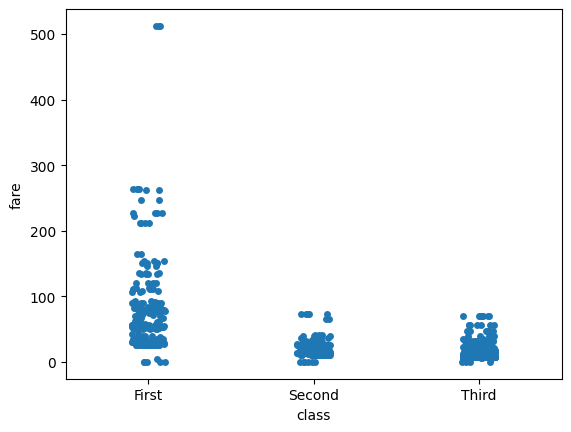

In [150]:
#  7.1 
titanic = sns.load_dataset('titanic')
sns.stripplot(x='class', y='fare', data=titanic)
plt.show()


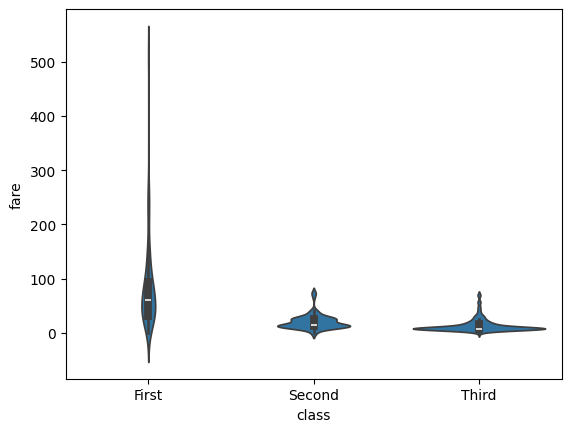

In [151]:
#7.2 
sns.violinplot(x='class', y='fare', data=titanic)
plt.show()


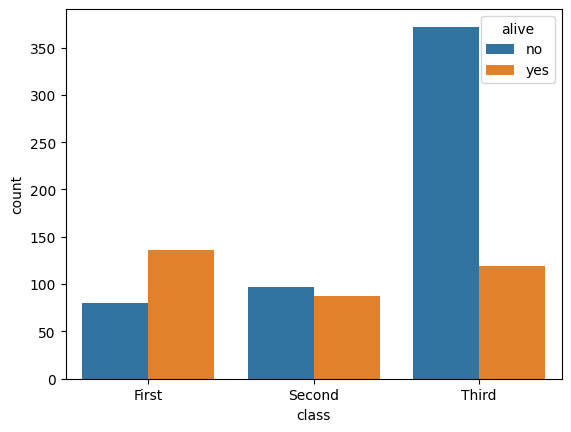

In [152]:
# 7.3
sns.countplot(x='class', hue='alive', data=titanic)
plt.show()


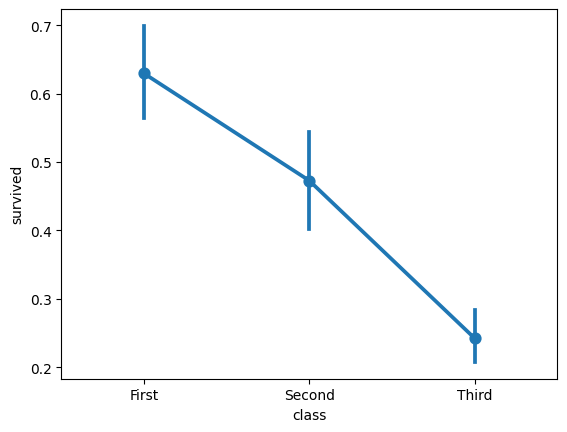

In [153]:
# 7.4 
sns.pointplot(x='class', y='survived', data=titanic)
plt.show()


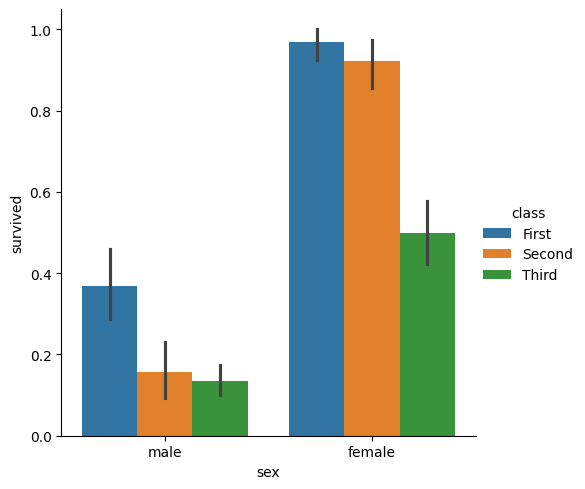

In [154]:
# 7.5
sns.catplot(x='sex', y='survived', hue='class', kind='bar', data=titanic)
plt.show()


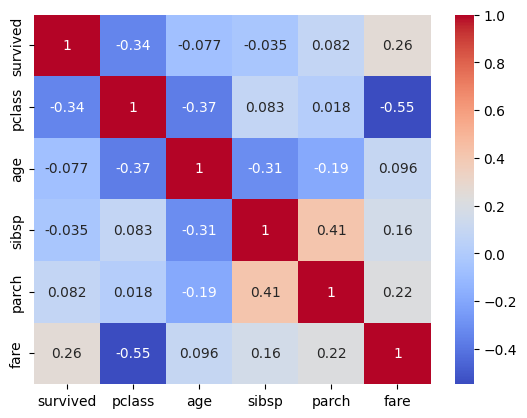

In [155]:
# 7.6
numeric_df = titanic.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


---